In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import autocorrelation_plot
from math import sqrt
import scipy as sp
from scipy import stats
import scipy.signal
from scipy.signal import fftconvolve, convolve
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
import random as ran

from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import *

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV, LogisticRegression
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer, ENGLISH_STOP_WORDS
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn import datasets
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from textacy.preprocess import preprocess_text

from gensim import corpora, models, matutils
from collections import defaultdict, Counter

import statsmodels.api as sm
import statsmodels.formula.api as sm
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

import tensorflow as tf
# Implementation of the Keras API meant to be a high-level API for TensorFlow
from tensorflow import keras
 # TensorFlow backend (Code for model cloning, plus model-related API entries)
from keras.models import Sequential # Model module
from keras.layers import Flatten, Dense, Dropout, Activation # Core layers
from keras.layers import Convolution2D, MaxPooling2D # CNN layers
from keras.utils import np_utils # Utilities

import patsy
from itertools import combinations

from imblearn.over_sampling import SMOTE

import graphviz
import json
import requests
import urllib
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from time import sleep
import re
import twitter

%matplotlib inline
#plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


How to Get Reproducible Results with Keras (the following cell is necessary) <br>
https://machinelearningmastery.com/reproducible-results-neural-networks-keras/

In [2]:
# Seed Random Numbers with the TensorFlow Backend

# Seed the generator (fix random seed for reproducibility)
np.random.seed(7)

# Sets the graph-level random seed
tf.set_random_seed(2)

## Build and document a working model, prototype, recommendation, or solution

### Using Neural Networks to Classify Images of Clothing

In [3]:
print(tf.__version__)

1.10.0


[Keras](https://www.tensorflow.org/guide/keras), a high-level API used to build and train deep learning models in TensorFlow.<br>
[Documentation](https://keras.io)

### Import the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) Dataset
* 70,000 grayscale images in 10 categories

The idea is to first train the model on a large number of samples of articles of clothing (see examples below), for which we know the true label (e.g. 'Dress' or 'Coat'). These are known as _training examples_ and _training labels_, respectively.

The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc) in an identical format to the articles of clothing.

Use 60,000 images to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow, just import and load the data:

In [4]:
# Keras built-in Fashion-MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
# Loads the Fashion-MNIST dataset
# Returns tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`
(X_train_images, y_train_labels), (X_test_images, y_test_labels) = fashion_mnist.load_data()

Loading the dataset returns four NumPy arrays:

* The `X_train_images` and `y_train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `X_test_images`, and `y_test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th> 
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td> 
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td> 
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td> 
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td> 
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td> 
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td> 
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td> 
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td> 
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td> 
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td> 
  </tr>
</table>

In [6]:
# Each image is mapped to a single label
# Since the class names are not included with the dataset, store them here to use later when plotting the images:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Examine the Data

#### Statistics of Training Set

The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [7]:
# Return the shape of the array
print('Shape of training images =', X_train_images.shape)

Shape of training images = (60000, 28, 28)


Likewise, there are 60,000 labels in the training set:

In [8]:
# Return the shape of the array
print(y_train_labels.shape)
print('Number of training labels =', len(y_train_labels))

(60000,)
Number of training labels = 60000


Each label is an integer between 0 and 9:

In [9]:
print('Unique training labels =', np.unique(y_train_labels))

Unique training labels = [0 1 2 3 4 5 6 7 8 9]


#### Statistics of Testing Set

There are 10,000 images in the testing set. Again, each image is represented as 28 x 28 pixels:

In [10]:
# Return the shape of the array
print('Shape of testing images =', X_test_images.shape)

Shape of testing images = (10000, 28, 28)


And the test set contains 10,000 images labels:

In [11]:
# Return the shape of the array
print(y_test_labels.shape)
print('Number of testing labels =', len(y_test_labels))

(10000,)
Number of testing labels = 10000


Each label is an integer between 0 and 9:

In [12]:
print('Unique testing labels =', np.unique(y_test_labels))

Unique testing labels = [0 1 2 3 4 5 6 7 8 9]


### Preprocess the Data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

In [13]:
# First image in training set
X_train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [14]:
# Return the minimum and maximum of an array
np.min(X_train_images), np.max(X_train_images)

(0, 255)

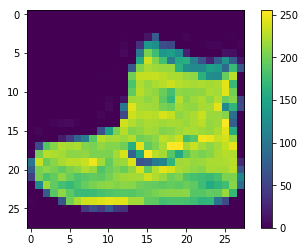

In [15]:
plt.figure()
plt.imshow(X_train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

We scale these values to a range of 0 to 1 before feeding to the neural network model. For this, we divide the values by 255. It's important that the *training set* and the *testing set* are preprocessed in the same way:

In [16]:
X_train_images = X_train_images / 255.0

In [17]:
X_test_images = X_test_images / 255.0

Display the first 25 images from the *training set* and display the class name below each image. Verify that the data is in the correct format and we're ready to build and train the network.

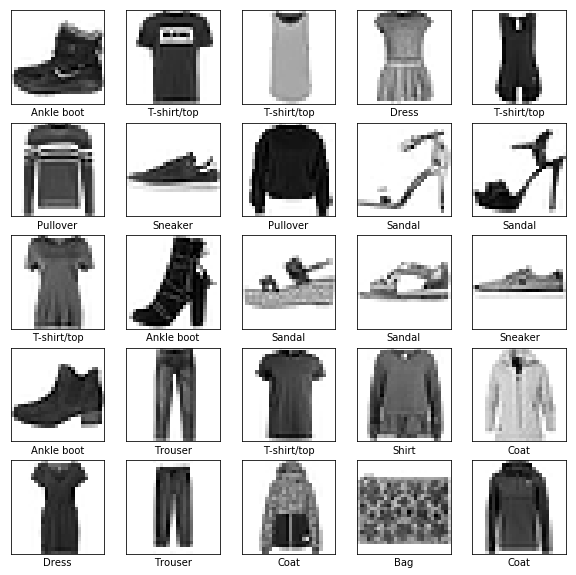

In [18]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_labels[i]])
plt.show()

### Build the Model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Setup the Layers

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. And, hopefully, these representations are more meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, like `tf.keras.layers.Dense`, have parameters that are learned during training.

### Define and Build NN Model

In [19]:
# Linear stack of neural network layers
model = Sequential()

In [20]:
# Input layer shape
input_shape = X_train_images[0].shape
input_shape

(28, 28)

In [21]:
# Adds a layer instance on top of the layer stack

# Flattens the input; does not affect the batch size
# Note: input_shape: dimensions of input shape (tuple of integers) when using this layer as the first layer in a model
# -> input_shape=(28, 28)
model.add(Flatten(input_shape=input_shape)) # input layer

In [22]:
# Adds a layer instance on top of the layer stack

# Just your regular densely-connected NN layer
# Note: units: positive integer, dimensionality of the output space
#       activation: activation function to use; if you don't specify anything, no activation is applied
# -> "tf.nn.relu" computes rectified linear: `max(features, 0)`
model.add(Dense(units=128, activation=tf.nn.relu)) # Densely or fully connected layer

In [23]:
# Output layer dimension
output_layer_dim = len(np.unique(y_train_labels))
output_layer_dim

10

In [24]:
# Adds a layer instance on top of the layer stack

# Just your regular densely-connected NN layer
# Note: units: positive integer, dimensionality of the output space
#       activation: activation function to use; if you don't specify anything, no activation is applied
# -> "tf.nn.softmax" computes softmax activations: `softmax = tf.exp(logits) / tf.reduce_sum(tf.exp(logits), axis)`
model.add(Dense(units=output_layer_dim, activation=tf.nn.softmax)) # output layer with 10 units

In [25]:
# Returns the list of all layer variables/weights
model.weights

[<tf.Variable 'dense_1/kernel:0' shape=(784, 128) dtype=float32_ref>,
 <tf.Variable 'dense_1/bias:0' shape=(128,) dtype=float32_ref>,
 <tf.Variable 'dense_2/kernel:0' shape=(128, 10) dtype=float32_ref>,
 <tf.Variable 'dense_2/bias:0' shape=(10,) dtype=float32_ref>]

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28*28 = 784 pixels. Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely-connected, or fully-connected, neural layers.
- The first `Dense` layer has 128 nodes (or neurons).
- The second (and last) layer is a 10-node *softmax* layer — this returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

### Compile the Model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [26]:
# Configures the model for training
# Note: optimizer: string (name of optimizer) or optimizer instance
#       loss: string (name of objective function) or objective function; if the model has multiple outputs, you can 
#             use a different loss on each output by passing a dictionary or a list of losses; the loss value that 
#             will be minimized by the model will then be the sum of all individual losses
#       metrics: list of metrics to be evaluated by the model during training and testing; typically you will
#                use `metrics=['accuracy']`; to specify different metrics for different outputs of a multi-output
#                model, you could also pass a dictionary, such as `metrics={'output_a': 'accuracy'}`
#model.compile(optimizer=tf.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
# Prints a string summary of the network
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Train the Model

Training the neural network model requires the following steps:

1. Feed the training data to the model — in this example, the `X_train_images` and `y_train_labels` arrays.
2. The model learns to associate images and labels.
3. We ask the model to make predictions about a test set — in this example, the `X_test_images` array. We verify that the predictions match the labels from the `y_test_labels` array. 

To start training, call the `model.fit` method — the model is "fit" to the training data:

In [28]:
# Train the model for a fixed number of epochs (iterations on a dataset)
# Note: batch_size: number of samples per gradient update
#       epochs: number of epochs to train the model; an epoch is an iteration over the entire `x` and `y` data provided
model.fit(X_train_images, y_train_labels, batch_size=32, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.5015 - acc: 0.8248
Epoch 2/5
60000/60000 [==============================] - 4s 59us/step - loss: 0.3749 - acc: 0.8646
Epoch 3/5
60000/60000 [==============================] - 3s 52us/step - loss: 0.3378 - acc: 0.8767
Epoch 4/5
60000/60000 [==============================] - 3s 55us/step - loss: 0.3129 - acc: 0.8863
Epoch 5/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.2948 - acc: 0.8918


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.89 (or 89%) on the training data.

### Evaluate Accuracy

Next, compare how the model performs on the test dataset:

In [29]:
# Returns the loss value & metrics values for the model in test mode
# Note: verbose: verbosity mode (0 = silent, 1 = progress bar)
test_loss, test_acc = model.evaluate(X_test_images, y_test_labels, verbose=0)

print('Testing loss:', round(test_loss, 3))
print('Testing accuracy score:', round(test_acc, 3))

Testing loss: 0.351
Testing accuracy score: 0.874


It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and testing accuracy is an example of *overfitting*. Overfitting is when a machine learning model performs worse on new data than on their training data. 

### Make Predictions

With the model trained, we can use it to make predictions about some images.

In [30]:
# Predict the class labels using the NN model
y_pred_labels = model.predict(X_test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [31]:
print(y_pred_labels[0])

[1.2383982e-05 1.7399394e-07 1.0332604e-06 3.5711778e-06 6.7100956e-07
 2.6209715e-03 9.2176442e-06 3.2752134e-02 3.8137492e-05 9.6456170e-01]


A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing. We can see which label has the highest confidence value:

In [32]:
# Returns the indices of the maximum values along an axis
np.argmax(y_pred_labels[0])

9

So the model is most confident that this image is an ankle boot, or `class_names[9]`. And we can check the test label to see this is correct:

In [33]:
y_test_labels[0]

9

We can graph this to look at the full set of 10 channels.

In [34]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel('{} {:2.0f}% (True: {})'.format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

Let's look at the 0th image, predictions, and prediction array. 

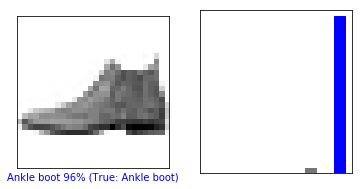

In [35]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, y_pred_labels, y_test_labels, X_test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, y_pred_labels, y_test_labels)
plt.show()

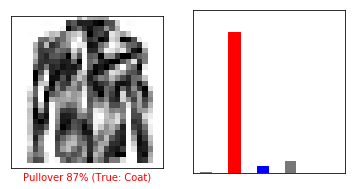

In [36]:
i = 17
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, y_pred_labels, y_test_labels, X_test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, y_pred_labels, y_test_labels)
plt.show()

Let's plot several images with their predictions. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percent (out of 100) for the predicted label. Note that it can be wrong even when very confident. 

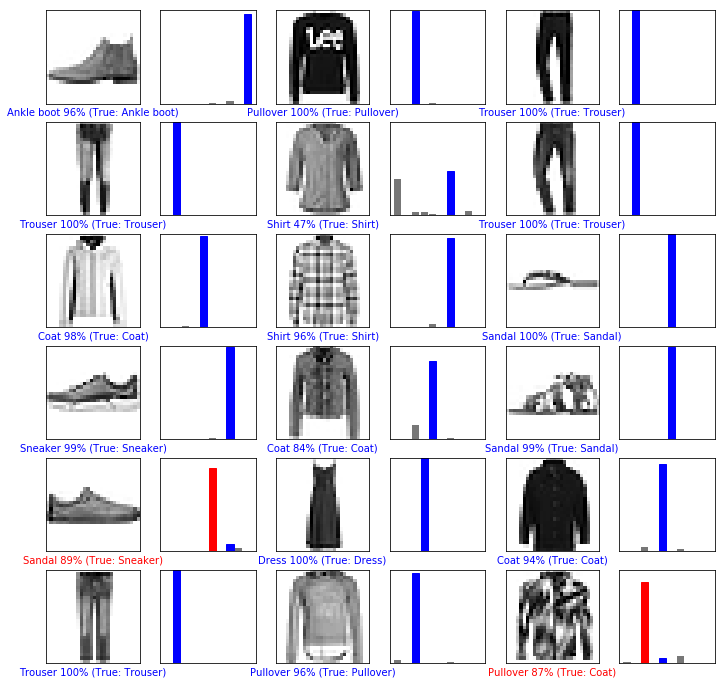

In [37]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 6
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, y_pred_labels, y_test_labels, X_test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, y_pred_labels, y_test_labels)
plt.show()

Finally, use the trained model to make a prediction about a single image. 

In [38]:
# Grab an image from the test dataset
img = X_test_images[0]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. So even though we're using a single image, we need to add it to a list:

Add the image to a batch where it's the only member.

In [39]:
# Expand the shape of an array
# -> Insert a new axis that will appear at the `axis` position in the expanded array shape
# Note: axis: integer; position in the expanded axes where the new axis is placed
img = np.expand_dims(img, axis=0)

print(img.shape)

(1, 28, 28)


Now predict the image:

In [40]:
# Predict the class labels using the NN model
y_pred_labels_single = model.predict(img)

print(y_pred_labels_single)

[[1.2384005e-05 1.7399394e-07 1.0332604e-06 3.5711746e-06 6.7101018e-07
  2.6209715e-03 9.2176442e-06 3.2752126e-02 3.8137492e-05 9.6456170e-01]]


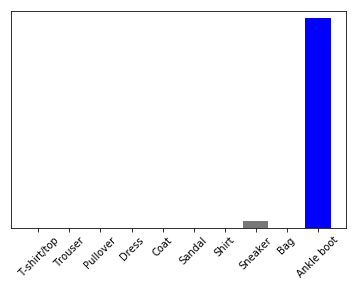

In [41]:
plot_value_array(0, y_pred_labels_single, y_test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

`model.predict` returns a list of lists, one for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [42]:
prediction_result = np.argmax(y_pred_labels_single[0])
print(prediction_result)

9


And, as before, the model predicts a label of 9.